In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import dates

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import and sort QUARTERLY dataset (Take columns in EUR, drop NAs)

In [3]:
df_credit_ratio = pd.read_excel(r"C:\Users\TEA\Desktop\tea\INSIDER ID\GDP_currentPrices_eur_BG_ECB.xlsx", sheet_name = "gdp_credit_ratio_Y")

In [4]:
df_credit_ratio.head()

,year,gdp,gdp_percent,Total loans,total_loans_percent,household_loans,household_loans_percentOf_gdp,corporate_loans,corporate_loans_percentOf_gdp,Unnamed: 9
0,2019,61558.05,90.697121,28874.371863,46.905924,11664.195890,18.948287,17210.175973,27.957637,NaN
1,2020,61330.96,90.362536,30374.671673,49.525838,12621.726160,20.579698,17752.945512,28.946140,NaN
2,2021,67872.11,100.000000,32330.759035,47.634822,13893.389868,20.469954,18437.369168,27.164868,52.365178


In [6]:
df_Q = pd.read_excel(r"C:\Users\TEA\Desktop\tea\INSIDER ID\GDP_currentPrices_eur_BG_ECB.xlsx", sheet_name = "gdp_credit_Q", index_col = 0, parse_dates = True)
df_Q.index.freq = "Q"

In [7]:
df_Q

,Year_Q,GDP EUR,GDP BGN,GDP growth (on corresponding Q),Average of credit_corporate BGN,Average of credit_corporate EUR,credit_corporate_growth (on corresponding quarter),Average of credit_household BGN,Average of credit_household EUR,credit_household_growth (on corresponding quarter)
Date,,,,,,,,,,
1996-03-31,1996Q1,3757.19,7367.039216,NaN,3489.740000,177.97674,NaN,5.891000,3.00441,NaN
1996-06-30,1996Q2,2561.83,5023.196078,NaN,4604.150000,234.81165,NaN,6.087667,3.10471,NaN
1996-09-30,1996Q3,2300.05,4509.901961,NaN,6094.020000,310.79502,NaN,5.029667,2.56513,NaN
1996-12-31,1996Q4,2244.39,4400.764706,NaN,8485.786667,432.77512,NaN,3.674667,1.87408,NaN
1997-03-31,1997Q1,1189.04,2331.450980,-68.352945,25888.973333,1320.33764,641.859661,6.737333,3.43604,14.366548
...,...,...,...,...,...,...,...,...,...,...
2020-12-31,2020Q4,17273.90,33870.392157,1.474306,354776.516667,18093.60235,2.446921,25429.311000,12968.94861,6.860176
2021-03-31,2021Q1,13812.84,27084.000000,4.536369,358118.190000,18264.02769,2.902125,25810.483333,13163.34650,6.562046
2021-06-30,2021Q2,15941.34,31257.529412,12.556477,357863.900000,18251.05890,3.826342,26730.837000,13632.72687,9.546755


In [8]:
df_BG_Q = df_Q.drop(["GDP BGN","Average of credit_corporate BGN","Average of credit_household BGN"], axis = 1)

In [9]:
df_BG_Q.dropna(inplace = True)

In [10]:
df_BG_Q  ## ---> Data is in EUR only

,Year_Q,GDP EUR,GDP growth (on corresponding Q),Average of credit_corporate EUR,credit_corporate_growth (on corresponding quarter),Average of credit_household EUR,credit_household_growth (on corresponding quarter)
Date,,,,,,,
1997-03-31,1997Q1,1189.04,-68.352945,1320.33764,641.859661,3.43604,14.366548
1997-06-30,1997Q2,2194.86,-14.324526,1179.97714,402.520697,4.02033,29.491321
1997-09-30,1997Q3,3321.20,44.396861,1325.43458,326.465836,19.95137,677.791769
1997-12-31,1997Q4,3230.07,43.917501,1179.95708,172.649010,71.85186,3733.980406
1998-03-31,1998Q1,2814.07,136.667396,762.87126,-42.221502,109.20800,3078.309915
...,...,...,...,...,...,...,...
2020-12-31,2020Q4,17273.90,1.474306,18093.60235,2.446921,12968.94861,6.860176
2021-03-31,2021Q1,13812.84,4.536369,18264.02769,2.902125,13163.34650,6.562046
2021-06-30,2021Q2,15941.34,12.556477,18251.05890,3.826342,13632.72687,9.546755


## Import and sort YEARLY dataset (Take columns in EUR, drop NAs)

In [13]:
df_Y = pd.read_excel(r"C:\Users\TEA\Desktop\tea\INSIDER ID\GDP_currentPrices_eur_BG_ECB.xlsx", sheet_name = "gdp_credit_Y")

In [14]:
df_Y

,Year,Sum of GDP EUR,Sum of GDP BGN,GDP yearly growth,Average of credit_corporate EUR,Average of credit_corporate BGN,credit_corporate_Y_growth,Yearly_corporate_gdp_ratio,Average of credit_household EUR,Average of credit_household BGN,credit_household_Y_growth,Yearly_household_gdp_ratio,yearly_total_loans_gdp_ratio_percent,yearly_total_loans(C+H) EUR
0,1996,10863.46,21300.901961,NaN,289.089632,566.842417,NaN,2.661119,2.637082,5.170750,NaN,0.024275,2.685394,291.726715
1,1997,9935.17,19480.725490,-8.545068,1251.426610,2453.777667,332.885330,12.595925,24.814900,48.656667,840.998243,0.249768,12.845694,1276.241510
2,1998,13442.81,26358.450980,35.305284,813.336907,1594.778250,-35.007223,6.050349,183.625968,360.050917,639.982702,1.365979,7.416328,996.962875
3,1999,12804.45,25106.764706,-4.748710,1022.407837,2004.721250,25.705329,7.984785,257.759355,505.410500,40.371952,2.013045,9.997830,1280.167192
4,2000,14414.50,28263.725490,12.574144,1258.655988,2467.952917,23.107036,8.731874,294.013428,576.496917,14.065085,2.039706,10.771580,1552.669415
5,2001,15907.26,31190.705882,10.355961,1495.374697,2932.107250,18.807260,9.400580,400.290925,784.884167,36.147158,2.516404,11.916984,1895.665622
6,2002,17478.70,34271.960784,9.878760,2032.115570,3984.540333,35.893403,11.626240,581.901117,1140.982583,45.369550,3.329201,14.955441,2614.016687
7,2003,18799.86,36862.470588,7.558686,2873.943160,5635.182667,41.426167,15.287046,973.039710,1907.921000,67.217364,5.175782,20.462827,3846.982870
8,2004,21091.25,41355.392157,12.188335,3992.238265,7827.918167,38.911525,18.928410,1733.819460,3399.646000,78.185889,8.220563,27.148973,5726.057725
9,2005,24039.64,47136.549020,13.979209,5314.337912,10420.270417,33.116752,22.106562,2929.693640,5744.497333,68.973397,12.186928,34.293490,8244.031552


In [15]:
df_BG_Y = df_Y.drop(["Sum of GDP BGN","Average of credit_corporate BGN","Average of credit_household BGN"], axis = 1)

In [16]:
df_BG_Y.dropna(inplace = True)

In [17]:
df_BG_Y ## --> Data is in EUR

,Year,Sum of GDP EUR,GDP yearly growth,Average of credit_corporate EUR,credit_corporate_Y_growth,Yearly_corporate_gdp_ratio,Average of credit_household EUR,credit_household_Y_growth,Yearly_household_gdp_ratio,yearly_total_loans_gdp_ratio_percent,yearly_total_loans(C+H) EUR
1,1997,9935.17,-8.545068,1251.426610,332.885330,12.595925,24.814900,840.998243,0.249768,12.845694,1276.241510
2,1998,13442.81,35.305284,813.336907,-35.007223,6.050349,183.625968,639.982702,1.365979,7.416328,996.962875
3,1999,12804.45,-4.748710,1022.407837,25.705329,7.984785,257.759355,40.371952,2.013045,9.997830,1280.167192
4,2000,14414.50,12.574144,1258.655988,23.107036,8.731874,294.013428,14.065085,2.039706,10.771580,1552.669415
5,2001,15907.26,10.355961,1495.374697,18.807260,9.400580,400.290925,36.147158,2.516404,11.916984,1895.665622
6,2002,17478.70,9.878760,2032.115570,35.893403,11.626240,581.901117,45.369550,3.329201,14.955441,2614.016687
7,2003,18799.86,7.558686,2873.943160,41.426167,15.287046,973.039710,67.217364,5.175782,20.462827,3846.982870
8,2004,21091.25,12.188335,3992.238265,38.911525,18.928410,1733.819460,78.185889,8.220563,27.148973,5726.057725
9,2005,24039.64,13.979209,5314.337912,33.116752,22.106562,2929.693640,68.973397,12.186928,34.293490,8244.031552
10,2006,27409.97,14.019885,6036.388475,13.586839,22.022602,4013.391832,36.990154,14.642088,36.664689,10049.780307


## TOTAL HOUSEHOLD LOANS 2010 - 2021 quarterly

In [18]:
df_BG_Q

,Year_Q,GDP EUR,GDP growth (on corresponding Q),Average of credit_corporate EUR,credit_corporate_growth (on corresponding quarter),Average of credit_household EUR,credit_household_growth (on corresponding quarter)
Date,,,,,,,
1997-03-31,1997Q1,1189.04,-68.352945,1320.33764,641.859661,3.43604,14.366548
1997-06-30,1997Q2,2194.86,-14.324526,1179.97714,402.520697,4.02033,29.491321
1997-09-30,1997Q3,3321.20,44.396861,1325.43458,326.465836,19.95137,677.791769
1997-12-31,1997Q4,3230.07,43.917501,1179.95708,172.649010,71.85186,3733.980406
1998-03-31,1998Q1,2814.07,136.667396,762.87126,-42.221502,109.20800,3078.309915
...,...,...,...,...,...,...,...
2020-12-31,2020Q4,17273.90,1.474306,18093.60235,2.446921,12968.94861,6.860176
2021-03-31,2021Q1,13812.84,4.536369,18264.02769,2.902125,13163.34650,6.562046
2021-06-30,2021Q2,15941.34,12.556477,18251.05890,3.826342,13632.72687,9.546755


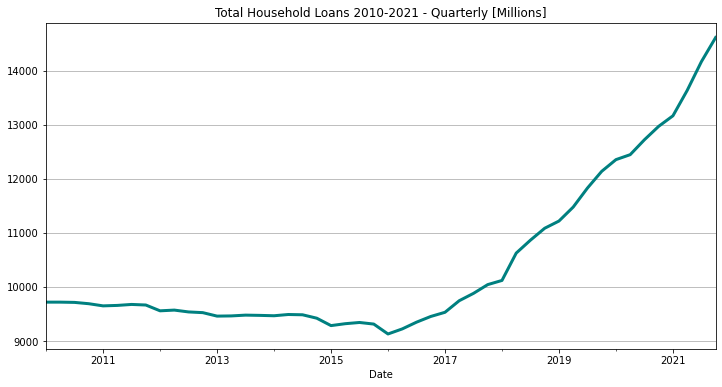

In [19]:
plt.title("Total Household Loans 2010-2021 - Quarterly [Millions]")
ax_H =df_BG_Q["31.3.2010":]["Average of credit_household EUR"].rename("Loans").plot(legend = False, figsize = (12,6), c= "teal", lw = 3)
ax_H.autoscale(axis = "x", tight = True)

ax_H.yaxis.grid(True)

## TOTAL HOUSEHOLD LOANS 2010 - 2021 yearly

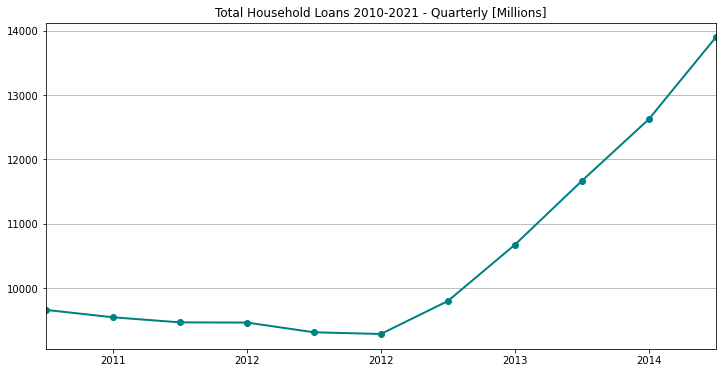

In [20]:
plt.title("Total Household Loans 2010-2021 - Quarterly [Millions]")
xl = ["2010","2011","2012","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
ax_H =df_BG_Y[14:]["Average of credit_household EUR"].rename("Loans").plot(legend = False, figsize = (12,6), c= "teal", lw = 2, marker = "o")
ax_H.autoscale(axis = "x", tight = True)
ax_H.set_xticklabels(xl)
ax_H.yaxis.grid(True)


## TOTAL CORPORATE LOANS 2010 - 2021 quarterly

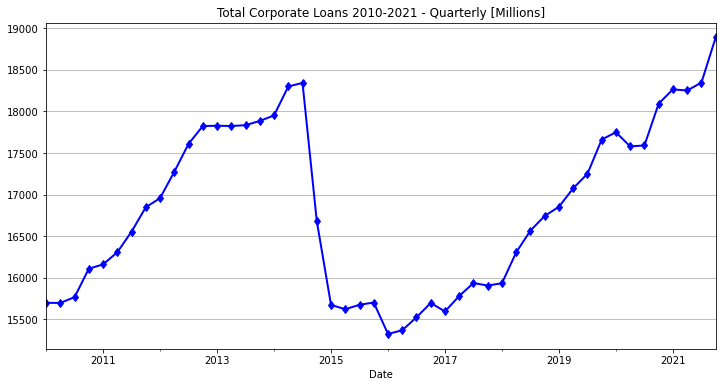

In [21]:
plt.title("Total Corporate Loans 2010-2021 - Quarterly [Millions]")
ax_H =df_BG_Q["31.3.2010":]["Average of credit_corporate EUR"].rename("Loans").plot(legend = False, figsize = (12,6), c= "b", lw= 2, marker = "d")

ax_H.yaxis.grid(True)


## TOTAL CORPORATE LOANS 2010 - 2021 yearly

## TOTAL CORPORATE & HOUSEHOLD LOANS

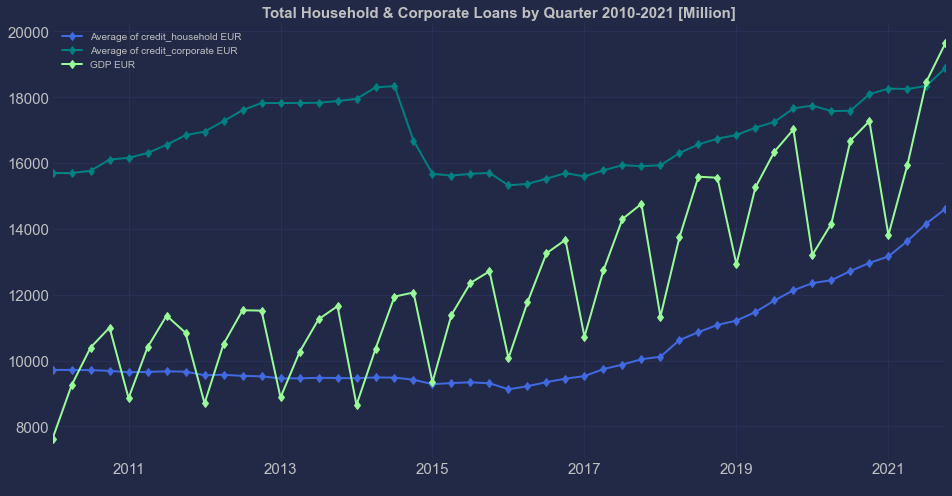

In [25]:
fig = plt.figure()
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.set_facecolor('#212946')

ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 0)
ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 0)
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('silver')
ax.title.set_color("silver")

ax.spines[["top","right","left","bottom"]].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.style.use("seaborn-dark")

df_BG_Q["31.3.2010":]["Average of credit_household EUR"].plot(legend = True, figsize = (16,8), c= "royalblue", lw= 2, marker = "d").set_title("Total Household & Corporate Loans by Quarter 2010-2021 [Million]", fontsize=15, color= 'silver', fontweight='bold', loc='center');
df_BG_Q["31.3.2010":]["Average of credit_corporate EUR"].plot(legend = True, figsize = (16,8), c= "teal", lw= 2, marker = "d").set_title("Total Household & Corporate Loans by Quarter 2010-2021 [Million]", fontsize=15, color= 'silver', fontweight='bold', loc='center');
df_BG_Q["31.3.2010":]["GDP EUR"].plot(legend = True, figsize = (16,8), c= "palegreen", lw= 2, marker = "d").set_title("Total Household & Corporate Loans by Quarter 2010-2021 [Million]", fontsize=15, color= 'silver', fontweight='bold', loc='center');
plt.grid(axis = "both", color = "#2A3459")

leg = plt.legend(loc='upper left',prop={'size': 10}) 
for text in leg.get_texts():
    text.set_color("silver")


    
plt.show()

In [27]:
df_BG_Q.head()

,Year_Q,GDP EUR,GDP growth (on corresponding Q),Average of credit_corporate EUR,credit_corporate_growth (on corresponding quarter),Average of credit_household EUR,credit_household_growth (on corresponding quarter)
Date,,,,,,,
1997-03-31,1997Q1,1189.04,-68.352945,1320.33764,641.859661,3.43604,14.366548
1997-06-30,1997Q2,2194.86,-14.324526,1179.97714,402.520697,4.02033,29.491321
1997-09-30,1997Q3,3321.20,44.396861,1325.43458,326.465836,19.95137,677.791769
1997-12-31,1997Q4,3230.07,43.917501,1179.95708,172.649010,71.85186,3733.980406
1998-03-31,1998Q1,2814.07,136.667396,762.87126,-42.221502,109.20800,3078.309915


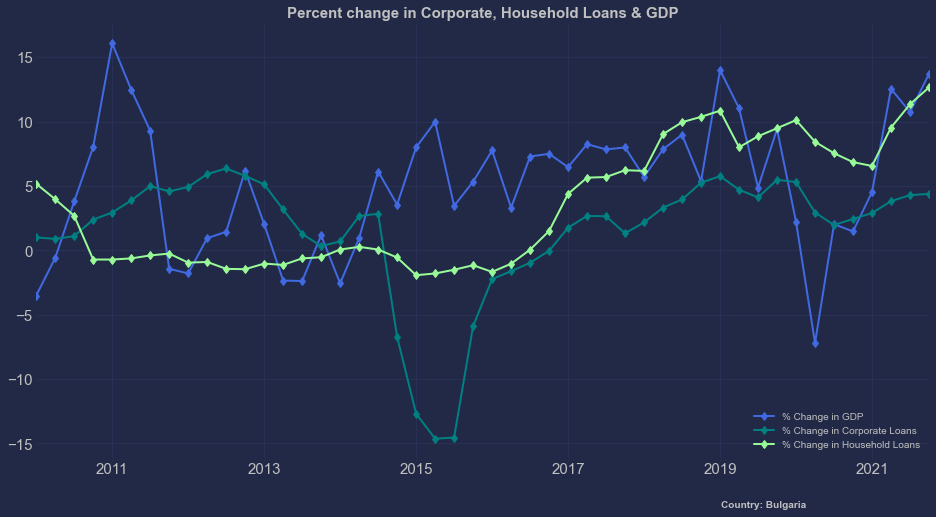

In [29]:
fig = plt.figure()
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.set_facecolor('#212946')
ax.set_facecolor('#212946')
ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('silver')
ax.title.set_color("silver")

plt.style.use("seaborn-dark")

df_BG_Q["31.3.2010":]["GDP growth (on corresponding Q)"].rename("% Change in GDP").plot(legend = True, figsize = (16,8), c= "royalblue", lw= 2, marker = "d").set_title("Percent change in Corporate, Household Loans & GDP", fontsize=15, color= 'silver', fontweight='bold', loc='center');
df_BG_Q["31.3.2010":]["credit_corporate_growth (on corresponding quarter)"].rename("% Change in Corporate Loans").plot(legend = True, figsize = (16,8), c= "teal", lw= 2, marker = "d").set_title("Percent change in Corporate, Household Loans & GDP", fontsize=15, color= 'silver', fontweight='bold', loc='center');
df_BG_Q["31.3.2010":]["credit_household_growth (on corresponding quarter)"].rename("% Change in Household Loans").plot(legend = True, figsize = (16,8), c= "palegreen", lw= 2, marker = "d").set_title("Percent change in Corporate, Household Loans & GDP", fontsize=15, color= 'silver', fontweight='bold', loc='center');
plt.grid(axis = "both", color = "#2A3459")

leg = plt.legend(loc='lower right',prop={'size': 10}) 
for text in leg.get_texts():
    text.set_color("silver")
plt.text(196.05, -20, "Country: Bulgaria", color = "silver",fontweight="bold")

plt.show()
#fig.savefig("C_H_Loans_GDP5_BG.png")

## GDP growth on corresponding quarter changes 2019 - 2021

In [30]:
gdp_growth_2019 = df_BG_Q["31.3.2019":][["GDP growth (on corresponding Q)","Year_Q"]]

In [31]:
gdp_growth_2019

,GDP growth (on corresponding Q),Year_Q
Date,,
2019-03-31,14.011805,2019Q1
2019-06-30,11.047226,2019Q2
2019-09-30,4.874228,2019Q3
2019-12-31,9.428869,2019Q4
2020-03-31,2.223500,2020Q1
2020-06-30,-7.198777,2020Q2
2020-09-30,2.038112,2020Q3
2020-12-31,1.474306,2020Q4
2021-03-31,4.536369,2021Q1


In [32]:
gdp_growth_2019 = pd.DataFrame(gdp_growth_2019)

Text(10.8, 14.01, '13.71%')

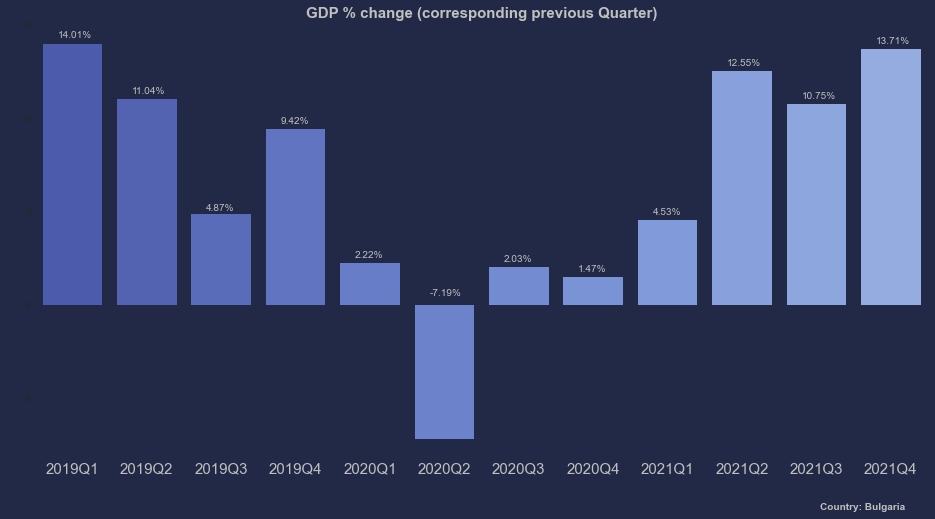

In [34]:
fig = plt.figure(figsize = (16,8))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')

ax.set_facecolor('#212946')
ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")

title = "GDP current prices - growth"
pal1 = sns.color_palette("coolwarm",len("GDP growth (on corresponding Q) 2019 - 2021"))
ax = sns.barplot(x = gdp_growth_2019["Year_Q"], y = gdp_growth_2019["GDP growth (on corresponding Q)"], data = gdp_growth_2019, palette = pal1, alpha = 0.9).set_title("GDP % change (corresponding previous Quarter)", fontsize=15, color= 'silver', fontweight='bold', loc='center');

plt.text(10.05, -11, "Country: Bulgaria", color = "silver",fontweight="bold")


plt.text(-0.2, 14.31, "14.01%", color = "silver")
plt.text(0.8, 11.34, "11.04%", color = "silver")
plt.text(1.8, 5.07, "4.87%", color = "silver")
plt.text(2.8, 9.72, "9.42%", color = "silver")
plt.text(3.8, 2.52, "2.22%", color = "silver")
plt.text(4.8, 0.49, "-7.19%", color = "silver")
plt.text(5.8, 2.33, "2.03%", color = "silver")
plt.text(6.8, 1.77, "1.47%", color = "silver")
plt.text(7.8, 4.83, "4.53%", color = "silver")
plt.text(8.8, 12.85, "12.55%", color = "silver")
plt.text(9.8, 11.05, "10.75%", color = "silver")
plt.text(10.8, 14.01, "13.71%", color = "silver")




#fig.savefig("C_H_Loans_GDP4_BG.png")

## LOANS growth on corresponding PREVIOUS quarter changes 2019 - 2021

### CORPORATE

In [35]:
CORPORATE_growth_2019 = df_BG_Q["31.3.2019":][["credit_corporate_growth (on corresponding quarter)","Year_Q"]]

In [36]:
CORPORATE_growth_2019

,credit_corporate_growth (on corresponding quarter),Year_Q
Date,,
2019-03-31,5.769378,2019Q1
2019-06-30,4.716198,2019Q2
2019-09-30,4.118194,2019Q3
2019-12-31,5.484514,2019Q4
2020-03-31,5.310800,2020Q1
2020-06-30,2.945397,2020Q2
2020-09-30,1.976247,2020Q3
2020-12-31,2.446921,2020Q4
2021-03-31,2.902125,2021Q1


In [37]:
CORPORATE_growth_2019 = pd.DataFrame(CORPORATE_growth_2019)

Text(10.8, 4.49, ' 4.39%')

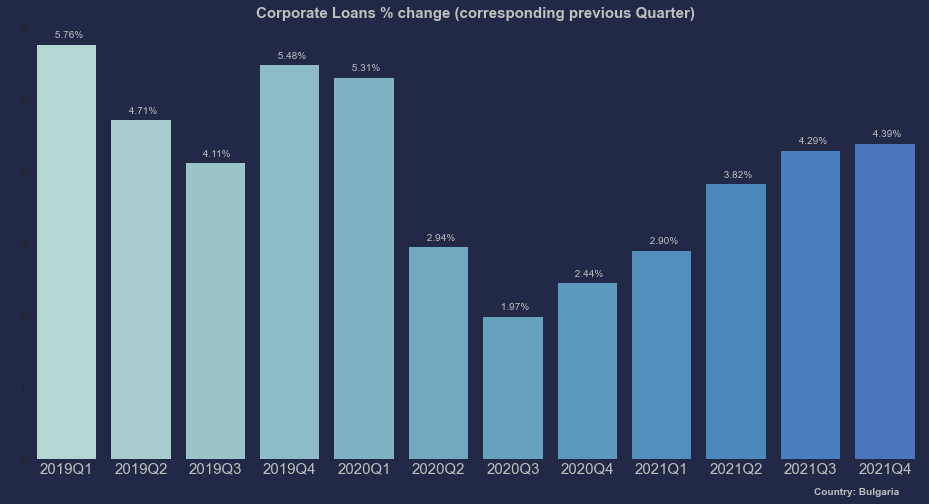

In [39]:
fig = plt.figure(figsize = (16,8))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')

ax.set_facecolor('#212946')
ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")


pal1 = sns.color_palette("icefire",len("credit_corporate_growth (on corresponding quarter)"))
ax = sns.barplot(x = CORPORATE_growth_2019["Year_Q"], y = CORPORATE_growth_2019["credit_corporate_growth (on corresponding quarter)"], data = CORPORATE_growth_2019, palette = pal1, alpha = 1).set_title("Corporate Loans % change (corresponding previous Quarter)", fontsize=15, color= 'silver', fontweight='bold', loc='center');

plt.text(10.05, -0.5, "Country: Bulgaria", color = "silver",fontweight="bold")


plt.text(-0.2, 5.86, " 5.76%", color = "silver")
plt.text(0.8, 4.81, " 4.71%", color = "silver")
plt.text(1.8, 4.21, " 4.11%", color = "silver")
plt.text(2.8, 5.58, " 5.48%", color = "silver")
plt.text(3.8, 5.41, " 5.31%", color = "silver")
plt.text(4.8, 3.04, " 2.94%", color = "silver")
plt.text(5.8, 2.07, " 1.97%", color = "silver")
plt.text(6.8, 2.54, " 2.44%", color = "silver")
plt.text(7.8, 3.00, " 2.90%", color = "silver")
plt.text(8.8, 3.92, " 3.82%", color = "silver")
plt.text(9.8, 4.39, " 4.29%", color = "silver")
plt.text(10.8, 4.49, " 4.39%", color = "silver")


#fig.savefig("C_H_Loans_GDP3_BG.png")

### HOUSEHOLD

In [40]:
HOUSEHOLD_growth_2019 = df_BG_Q["31.3.2019":][["credit_household_growth (on corresponding quarter)","Year_Q"]]

In [41]:
HOUSEHOLD_growth_2019 = pd.DataFrame(HOUSEHOLD_growth_2019)

In [42]:
HOUSEHOLD_growth_2019

,credit_household_growth (on corresponding quarter),Year_Q
Date,,
2019-03-31,10.855722,2019Q1
2019-06-30,8.011583,2019Q2
2019-09-30,8.868132,2019Q3
2019-12-31,9.493842,2019Q4
2020-03-31,10.123260,2020Q1
2020-06-30,8.442736,2020Q2
2020-09-30,7.551328,2020Q3
2020-12-31,6.860176,2020Q4
2021-03-31,6.562046,2021Q1


Text(10.8, 12.86, '12.66%')

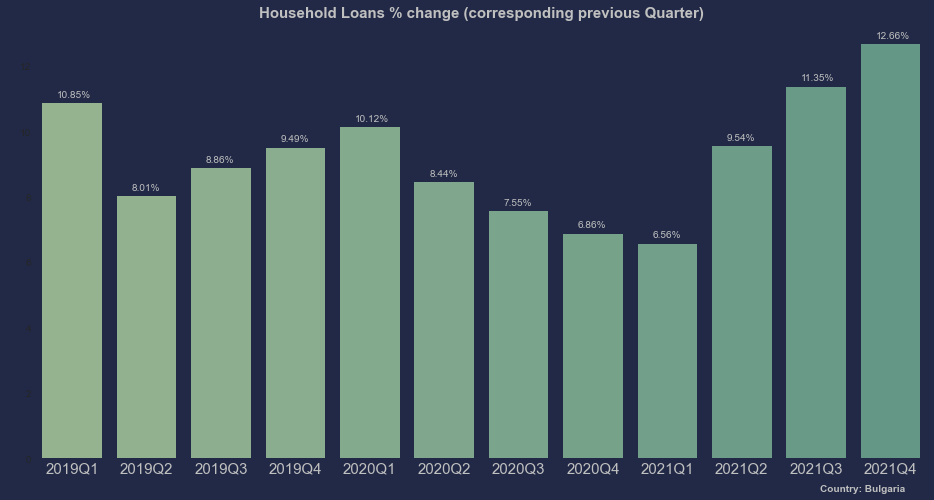

In [43]:
fig = plt.figure(figsize = (16,8))
ax=plt.axes()
fig.patch.set_facecolor('#212946')

#ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212946')

ax.set_facecolor('#212946')
ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")


pal1 = sns.color_palette("crest",len("credit_household_growth (on corresponding quarter)"))
ax = sns.barplot(x = HOUSEHOLD_growth_2019["Year_Q"], y = HOUSEHOLD_growth_2019["credit_household_growth (on corresponding quarter)"], data = CORPORATE_growth_2019, palette = pal1, alpha = 0.9).set_title("Household Loans % change (corresponding previous Quarter)", fontsize=15, color= 'silver', fontweight='bold', loc='center');

plt.text(10.05, -1, "Country: Bulgaria", color = "silver",fontweight="bold")


plt.text(-0.2, 11.05, "10.85%", color = "silver")
plt.text(0.8, 8.21, "8.01%", color = "silver")
plt.text(1.8, 9.06, "8.86%", color = "silver")
plt.text(2.8, 9.69, "9.49%", color = "silver")
plt.text(3.8, 10.32, "10.12%", color = "silver")
plt.text(4.8, 8.64, "8.44%", color = "silver")
plt.text(5.8, 7.75, "7.55%", color = "silver")
plt.text(6.8, 7.06, "6.86%", color = "silver")
plt.text(7.8, 6.76, "6.56%", color = "silver")
plt.text(8.8, 9.74, "9.54%", color = "silver")
plt.text(9.8, 11.55, "11.35%", color = "silver")
plt.text(10.8, 12.86, "12.66%", color = "silver")



#fig.savefig("C_H_Loans_GDP2_BG.png")


## % CHANGE ON PREVIOUS CORRESPONDING QUARTER CORPORATE & HOUSEHOLD LOANS

In [45]:
loans_growth_2019 = df_BG_Q["31.3.2019":][["credit_household_growth (on corresponding quarter)","credit_corporate_growth (on corresponding quarter)","Year_Q"]]

In [46]:
loans_growth_2019 = pd.DataFrame(loans_growth_2019)

Text(10.8, 12.86, '12.66%')

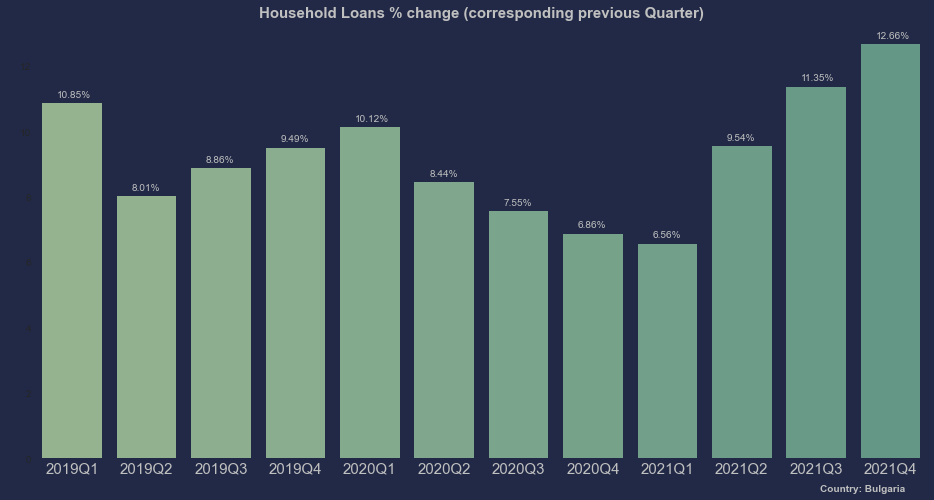

In [47]:
fig = plt.figure(figsize = (16,8))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')

ax.set_facecolor('#212946')
ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")


pal1 = sns.color_palette("crest",len("credit_household_growth (on corresponding quarter)"))
ax = sns.barplot(x = HOUSEHOLD_growth_2019["Year_Q"], y = HOUSEHOLD_growth_2019["credit_household_growth (on corresponding quarter)"], data = CORPORATE_growth_2019, palette = pal1, alpha = 0.9).set_title("Household Loans % change (corresponding previous Quarter)", fontsize=15, color= 'silver', fontweight='bold', loc='center');

plt.text(10.05, -1, "Country: Bulgaria", color = "silver",fontweight="bold")


plt.text(-0.2, 11.05, "10.85%", color = "silver")
plt.text(0.8, 8.21, "8.01%", color = "silver")
plt.text(1.8, 9.06, "8.86%", color = "silver")
plt.text(2.8, 9.69, "9.49%", color = "silver")
plt.text(3.8, 10.32, "10.12%", color = "silver")
plt.text(4.8, 8.64, "8.44%", color = "silver")
plt.text(5.8, 7.75, "7.55%", color = "silver")
plt.text(6.8, 7.06, "6.86%", color = "silver")
plt.text(7.8, 6.76, "6.56%", color = "silver")
plt.text(8.8, 9.74, "9.54%", color = "silver")
plt.text(9.8, 11.55, "11.35%", color = "silver")
plt.text(10.8, 12.86, "12.66%", color = "silver")



#fig.savefig("C_H_Loans_GDP2_BG.png")

## YEARLY % LOANS FROM GDP

In [48]:
df_BG_Y_2019 = df_BG_Y[22:]

In [49]:
df_BG_Y_2019

,Year,Sum of GDP EUR,GDP yearly growth,Average of credit_corporate EUR,credit_corporate_Y_growth,Yearly_corporate_gdp_ratio,Average of credit_household EUR,credit_household_Y_growth,Yearly_household_gdp_ratio,yearly_total_loans_gdp_ratio_percent,yearly_total_loans(C+H) EUR
23,2019,61558.05,9.485855,17210.175973,5.017311,27.957637,11664.195890,9.288517,18.948287,46.905924,28874.371863
24,2020,61330.96,-0.368904,17752.945512,3.153771,28.946140,12621.726160,8.209141,20.579698,49.525838,30374.671673
25,2021,67872.11,10.665331,18437.369168,3.855268,27.164868,13893.389868,10.075196,20.469954,47.634822,32330.759035


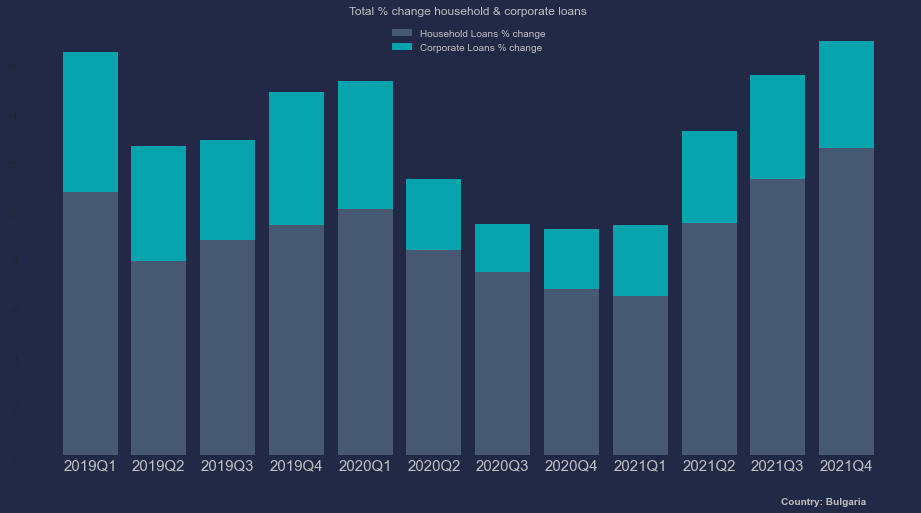

In [50]:
fig = plt.figure(figsize = (16,8))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')

ax.set_facecolor('#212946')
ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
#ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")

X = loans_growth_2019["Year_Q"]
#X = ["2019Q1",'2019Q2','2019Q3','2019Q4','2020Q1','2020Q2','2020Q3', '2020Q4','2021Q1','2021Q2', '2021Q3','2021Q4']
Y = loans_growth_2019["credit_household_growth (on corresponding quarter)"]
Z = loans_growth_2019["credit_corporate_growth (on corresponding quarter)"]
X_axis = np.arange(len(X))


# plot bars in stack manner
plt.bar(X, Y, color='lightblue',label = 'Household Loans % change', alpha = 0.28)
plt.bar(X, Z, bottom=Y, color='darkturquoise',label = 'Corporate Loans % change', alpha = 0.75)

plt.xticks(X_axis, X)
plt.xlabel("Year")

plt.title("Total % change household & corporate loans")
leg = plt.legend(loc=9)
for text in leg.get_texts():
  text.set_color("silver")

plt.text(10.05, -2, "Country: Bulgaria", color = "silver",fontweight="bold")
plt.show()
#fig.savefig("C_H_Loans_GDP1_BG.png")

In [51]:
df_credit_ratio2 = df_credit_ratio[["year","gdp","household_loans","corporate_loans"]]

In [52]:
df_credit_ratio

,year,gdp,gdp_percent,Total loans,total_loans_percent,household_loans,household_loans_percentOf_gdp,corporate_loans,corporate_loans_percentOf_gdp,Unnamed: 9
0,2019,61558.05,90.697121,28874.371863,46.905924,11664.195890,18.948287,17210.175973,27.957637,NaN
1,2020,61330.96,90.362536,30374.671673,49.525838,12621.726160,20.579698,17752.945512,28.946140,NaN
2,2021,67872.11,100.000000,32330.759035,47.634822,13893.389868,20.469954,18437.369168,27.164868,52.365178


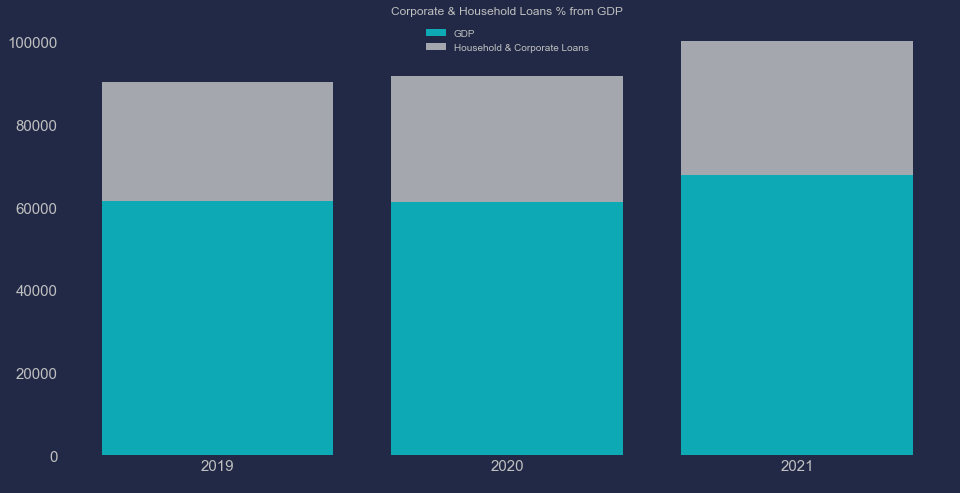

In [53]:
fig = plt.figure(figsize = (16,8))
fig.patch.set_facecolor('#212946')

ax=plt.axes()
ax.patch.set_facecolor('#212946')
ax.set_facecolor('#212946')
ax.tick_params(axis='x', colors='silver', labelsize = 15.0, width = 35, which = "major")
ax.tick_params(axis='y', colors='silver',labelsize = 15.0, width = 35, which = "major")
ax.xaxis.label.set_color('#212946')
ax.yaxis.label.set_color('#212946')
ax.title.set_color("silver")

X = ["2019",'2020','2021']
Y = df_BG_Y_2019["Sum of GDP EUR"]
Z = df_BG_Y_2019["yearly_total_loans(C+H) EUR"]


X_axis = np.arange(len(X))


# plot bars in stack manner
plt.bar(X, Y, color='cyan',label = 'GDP', alpha = 0.6)
plt.bar(X, Z, bottom=Y, color='lightgrey',label = 'Household & Corporate Loans', alpha = 0.75)


plt.xticks(X_axis, X)
plt.xlabel("Year")

plt.title("Corporate & Household Loans % from GDP")
leg = plt.legend(loc=9)
for text in leg.get_texts():
  text.set_color("silver")


plt.show()

## PIE CHART - loans and corporate credit as percent of gdp - sub credits for each

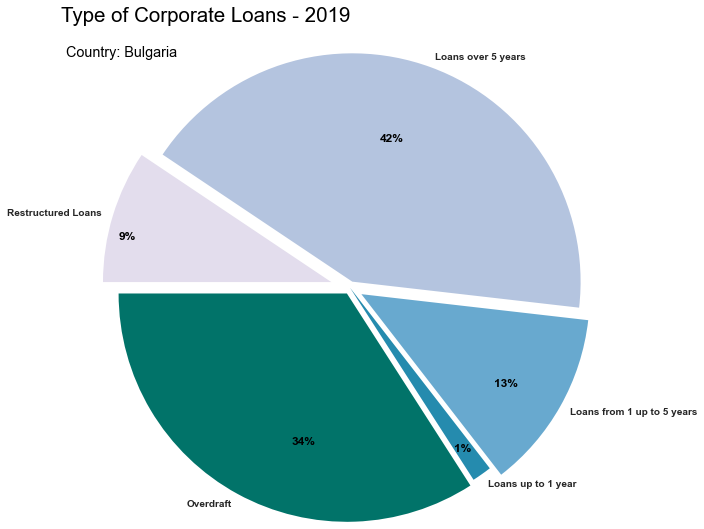

In [54]:
y = np.array([5868.22, 238.85, 2185.04, 7301.02,1617.02])
mylabels = ["Overdraft", "Loans up to 1 year", "Loans from 1 up to 5 years", "Loans over 5 years", "Restructured Loans"]

plt.figure(figsize = (4,3))
explode = (0.1, 0.0, 0.2, 0.1, 0.3)


labels = mylabels
pal1 = sns.color_palette("PuBuGn_r", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Corporate Loans - 2019", fontdict = {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-0.9,-2.4,"34%", color = "black",size = 'large',fontweight="demi")
plt.text(1.6,-2.5,"1%", color = "black",size = 'large',fontweight="demi")
plt.text(2.2,-1.5,"13%", color = "black",size = 'large',fontweight="demi")
plt.text(0.45,2.25,"42%", color = "black",size = 'large',fontweight="demi")
plt.text(-3.55,0.75,"9%", color = "black",size = 'large',fontweight="demi");

plt.text(-4.35,3.55,"Country: Bulgaria", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_corporateLoans.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

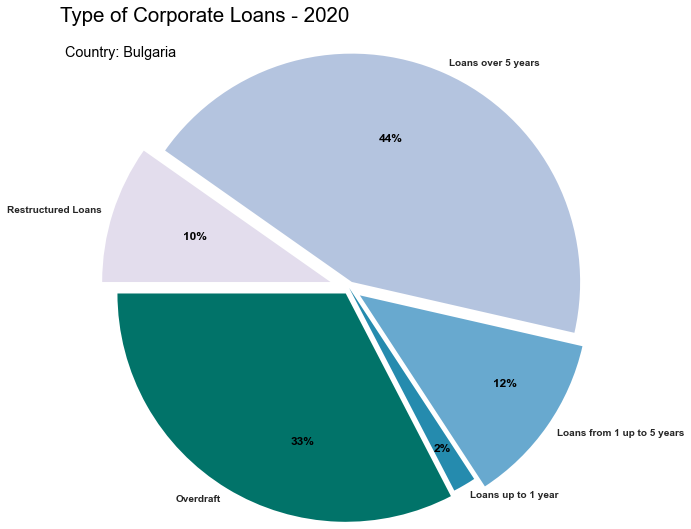

In [55]:
y = np.array([5790.42, 285.24, 2166.25, 7778.36,1732.65])
mylabels = ["Overdraft", "Loans up to 1 year", "Loans from 1 up to 5 years", "Loans over 5 years", "Restructured Loans"]


plt.figure(figsize = (4,3))
explode = (0.1, 0.0, 0.2, 0.1, 0.3)

mylabels = ["Overdraft", "Loans up to 1 year", "Loans from 1 up to 5 years", "Loans over 5 years", "Restructured Loans"]
pal1 = sns.color_palette("PuBuGn_r", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Corporate Loans - 2020", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-0.9,-2.4,"33%", color = "black",size = 'large',fontweight="demi")
plt.text(1.3,-2.5,"2%", color = "black",size = 'large',fontweight="demi")
plt.text(2.2,-1.5,"12%", color = "black",size = 'large',fontweight="demi")
plt.text(0.45,2.25,"44%", color = "black",size = 'large',fontweight="demi")
plt.text(-2.55,0.75,"10%", color = "black",size = 'large',fontweight="demi");

plt.text(-4.35,3.55,"Country: Bulgaria", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_corporateLoans_2020.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()



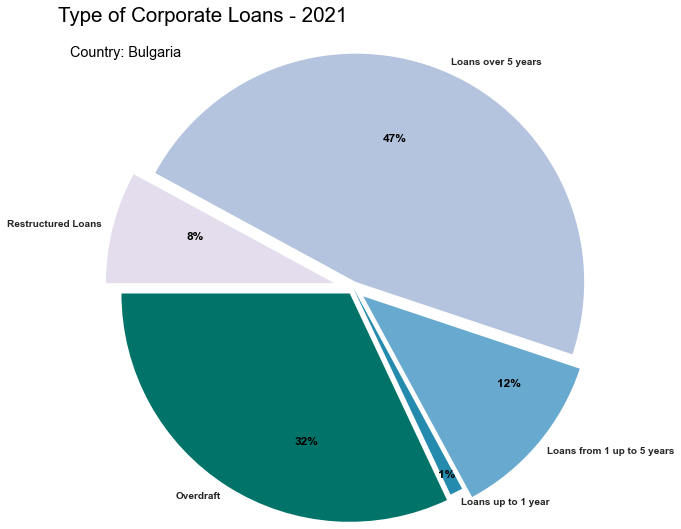

In [56]:
y = np.array([5900.17, 167.14, 2205.50, 8704.08,1460.46])
mylabels = ["Overdraft", "Loans up to 1 year", "Loans from 1 up to 5 years", "Loans over 5 years", "Restructured Loans"]


plt.figure(figsize = (4,3))
explode = (0.1, 0.0, 0.2, 0.1, 0.3)

mylabels = ["Overdraft", "Loans up to 1 year", "Loans from 1 up to 5 years", "Loans over 5 years", "Restructured Loans"]
pal1 = sns.color_palette("PuBuGn_r", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Corporate Loans - 2021 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 200)

plt.text(-0.9,-2.4,"32%", color = "black",size = 'large',fontweight="demi")
plt.text(1.305,-2.9,"1%", color = "black",size = 'large',fontweight="demi")
plt.text(2.2,-1.5,"12%", color = "black",size = 'large',fontweight="demi")
plt.text(0.45,2.25,"47%", color = "black",size = 'large',fontweight="demi")
plt.text(-2.55,0.75,"8%", color = "black",size = 'large',fontweight="demi");

plt.text(-4.35,3.55,"Country: Bulgaria", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_corporateLoans_2021.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

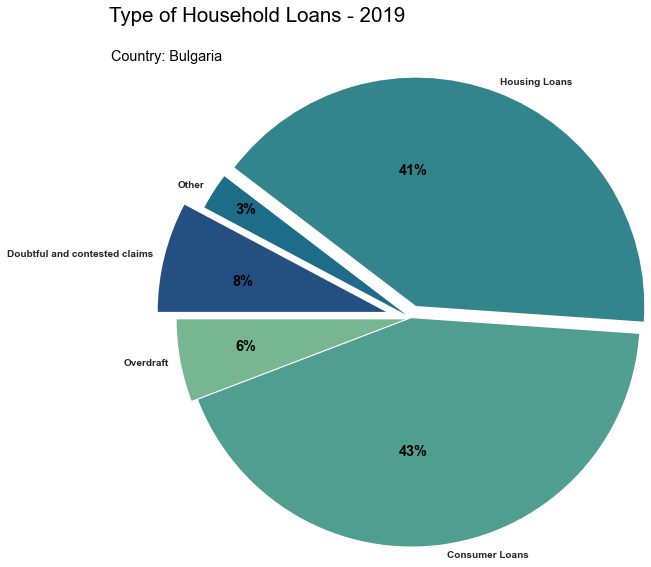

In [57]:
y = np.array([677.05, 5027.47, 4750.21, 301.80,907.64])
mylabels = ["Overdraft", "Consumer Loans", "Housing Loans", "Other","Doubtful and contested claims"]


plt.figure(figsize = (4,3))
explode = (0.1, 0.0, 0.2, 0.1,0.4)

pal1 = sns.color_palette("crest", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Household Loans - 2019 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 230)

plt.text(-2.7,-0.5,"6%", color = "black", size = 'x-large',fontweight="demi")
plt.text(-0.2,-2.1,"43%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-0.2,2.2,"41%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-2.7,1.6,"3%", color = "black",size = 'x-large',fontweight="demi");
plt.text(-2.75,0.50,"8%", color = "black",size = 'x-large',fontweight="demi");

plt.text(-4.60,3.95,"Country: Bulgaria", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_HouseholdLoans_2019.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

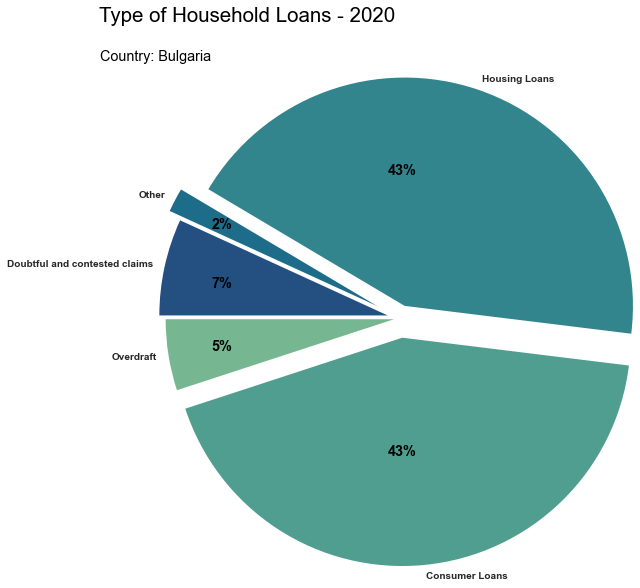

In [58]:
y = np.array([634.97, 5430.38, 5479.17, 213.95,863.23])
mylabels = ["Overdraft", "Consumer Loans", "Housing Loans", "Other","Doubtful and contested claims"]


plt.figure(figsize = (4,3))
explode = (0.1, 0.3, 0.2, 0.4,0.2)

pal1 = sns.color_palette("crest", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Household Loans - 2020 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 230)

plt.text(-2.9,-0.5,"5%", color = "black", size = 'x-large',fontweight="demi")
plt.text(-0.2,-2.1,"43%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-0.2,2.2,"43%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-2.9,1.37,"2%", color = "black",size = 'x-large',fontweight="demi");
plt.text(-2.9,0.47,"7%", color = "black",size = 'x-large',fontweight="demi");

plt.text(-4.60,3.95,"Country: Bulgaria", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_HouseholdLoans_2020.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()

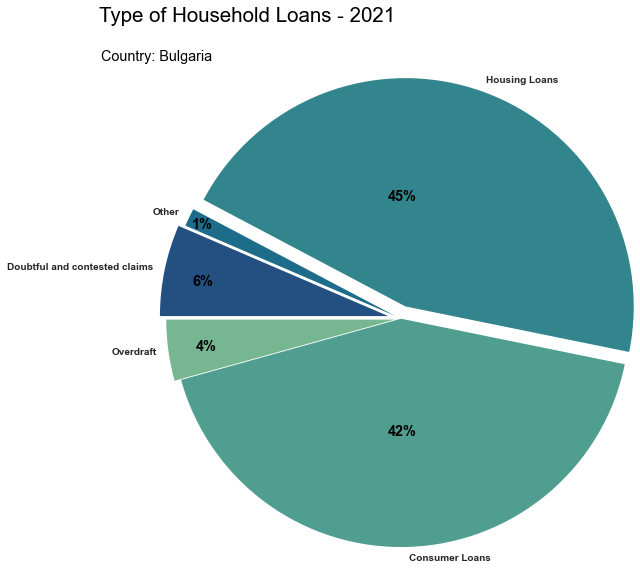

In [59]:
y = np.array([599.90, 5902.87, 6315.61, 176.67,898.32])
mylabels = ["Overdraft", "Consumer Loans", "Housing Loans", "Other","Doubtful and contested claims"]


plt.figure(figsize = (4,3))
explode = (0.1, 0.0, 0.2, 0.1,0.2)

pal1 = sns.color_palette("crest", len(y))
patches, texts = plt.pie(y, labels = mylabels,radius = 3.5,colors = pal1, startangle = 180, textprops={"fontsize":10,"fontweight":'bold'}, labeldistance=1.05, explode = explode)
labels = mylabels
#plt.legend(patches, labels, loc="upper right", fontsize = "x-large")

plt.title("Type of Household Loans - 2021 ", fontdict =   
          {'fontsize': "20.5",
           'fontweight': "20",
           'color': 'black',
           'verticalalignment': 'top',
            'horizontalalignment': "right"}, pad = 230)

plt.text(-3.15,-0.5,"4%", color = "black", size = 'x-large',fontweight="demi")
plt.text(-0.2,-1.8,"42%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-0.2,1.8,"45%", color = "black",size = 'x-large',fontweight="demi")
plt.text(-3.2,1.38,"1%", color = "black",size = 'x-large',fontweight="demi");
plt.text(-3.2,0.50,"6%", color = "black",size = 'x-large',fontweight="demi");

plt.text(-4.60,3.95,"Country: Bulgaria", color = "black",size = 'x-large',fontweight="light");

#plt.savefig("Type_of_HouseholdLoans_2021.jpg", dpi = 100, bbox_inches = "tight",pad_inches = 0.5)
plt.show()